In [9]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Import model from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator, MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import pickle

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
def heading(title):
    print('_' * 50)
    print(' ' * 15, title.upper())
    print('_' * 50)

In [14]:
df = sns.load_dataset('diamonds').sample(5000, random_state=42)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


In [15]:
heading('DataFrame Information')
print(f"• Total entries: {df.shape[0]}")
print(f"• Total columns: {df.shape[1]}")

__________________________________________________
                DATAFRAME INFORMATION
__________________________________________________
• Total entries: 5000
• Total columns: 10


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1388 to 7126
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    5000 non-null   float64 
 1   cut      5000 non-null   category
 2   color    5000 non-null   category
 3   clarity  5000 non-null   category
 4   depth    5000 non-null   float64 
 5   table    5000 non-null   float64 
 6   price    5000 non-null   int64   
 7   x        5000 non-null   float64 
 8   y        5000 non-null   float64 
 9   z        5000 non-null   float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 328.1 KB


In [18]:
def print_data_summary(df):
    categorical_columns = df.select_dtypes(
        include = ['object', 'category']).shape[1]

    float_columns = df.select_dtypes(include=['float64']).shape[1]
    int_columns = df.select_dtypes(include=['int64']).shape[1]

    print(f"• Categorical Columns: {categorical_columns}")
    print(f"• Float Columns: {float_columns}")
    print(f"• Integer Columns: {int_columns}")
    print(
        f"• Total Columns: {categorical_columns + float_columns + int_columns}"
    )
    print('\n')

heading('DataFrame Summary')
print_data_summary(df)

__________________________________________________
                DATAFRAME SUMMARY
__________________________________________________
• Categorical Columns: 3
• Float Columns: 6
• Integer Columns: 1
• Total Columns: 10




In [20]:
df.rename(columns={'x': 'x_length', 'y': 'y_width', 'z': 'z_depth'}, inplace=True)
columns = df.columns.tolist()
heading('Updated Diamond dataset Columns')

for column in columns:
    print(f"• {column}")

__________________________________________________
                UPDATED DIAMOND DATASET COLUMNS
__________________________________________________
• carat
• cut
• color
• clarity
• depth
• table
• price
• x_length
• y_width
• z_depth


In [21]:
df.describe()

,carat,depth,table,price,x_length,y_width,z_depth
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.797118,61.783100,57.438580,3917.294400,5.721784,5.722654,3.533868
std,0.483612,1.436638,2.267361,4044.422491,1.138951,1.131908,0.702334
min,0.200000,54.400000,49.000000,335.000000,3.850000,3.810000,1.410000
25%,0.390000,61.100000,56.000000,920.500000,4.680000,4.690000,2.890000
50%,0.700000,61.900000,57.000000,2352.000000,5.690000,5.700000,3.510000
75%,1.040000,62.500000,59.000000,5252.750000,6.540000,6.540000,4.030000
max,4.010000,71.200000,73.000000,18823.000000,10.140000,10.100000,6.310000


In [22]:
stats = df.describe()

heading("Summary Statistics")

print(f"""
1. The dataset consists of {int(stats.loc['count', 'carat'])} diamond records.
2. Diamond carat weights range from {stats.loc['min', 'carat']} to {stats.loc['max', 'carat']}, with an average of {stats.loc['mean', 'carat']:.2f}.
3. The mean depth percentage is {stats.loc['mean', 'depth']:.2f}%, with a standard deviation of {stats.loc['std', 'depth']:.2f}%.
4. The average table size is {stats.loc['mean', 'table']:.2f}%, varying typically by {stats.loc['std', 'table']:.2f}%.
5. Prices vary widely, from ${stats.loc['min', 'price']:.2f} to ${stats.loc['max', 'price']:.2f}, indicating significant diversity in diamond quality and size.
6. The mean dimensions (length x width x depth) in millimeters are approximately ({stats.loc['mean', 'x_length']:.2f} x {stats.loc['mean', 'y_width']:.2f} x {stats.loc['mean', 'z_depth']:.2f}).
7. The standard deviation in the lengths and widths suggests some variation in diamond shapes and cuts.
8. The 50th percentile (median) values are generally close to the mean, suggesting a relatively symmetrical distribution for carat, depth, and table.
""")

__________________________________________________
                SUMMARY STATISTICS
__________________________________________________

1. The dataset consists of 5000 diamond records.
2. Diamond carat weights range from 0.2 to 4.01, with an average of 0.80.
3. The mean depth percentage is 61.78%, with a standard deviation of 1.44%.
4. The average table size is 57.44%, varying typically by 2.27%.
5. Prices vary widely, from $335.00 to $18823.00, indicating significant diversity in diamond quality and size.
6. The mean dimensions (length x width x depth) in millimeters are approximately (5.72 x 5.72 x 3.53).
7. The standard deviation in the lengths and widths suggests some variation in diamond shapes and cuts.
8. The 50th percentile (median) values are generally close to the mean, suggesting a relatively symmetrical distribution for carat, depth, and table.



In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1388 to 7126
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   carat     5000 non-null   float64 
 1   cut       5000 non-null   category
 2   color     5000 non-null   category
 3   clarity   5000 non-null   category
 4   depth     5000 non-null   float64 
 5   table     5000 non-null   float64 
 6   price     5000 non-null   int64   
 7   x_length  5000 non-null   float64 
 8   y_width   5000 non-null   float64 
 9   z_depth   5000 non-null   float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 328.1 KB


In [24]:
le_color = LabelEncoder()

df['color'] = le_color.fit_transform(df['color'])

le_cut = LabelEncoder()
df['cut'] = le_cut.fit_transform(df['cut'])

le_clarity = LabelEncoder()
df['clarity'] = le_clarity.fit_transform(df['clarity'])

In [25]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1388 to 7126
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     5000 non-null   float64
 1   cut       5000 non-null   int64  
 2   color     5000 non-null   int64  
 3   clarity   5000 non-null   int64  
 4   depth     5000 non-null   float64
 5   table     5000 non-null   float64
 6   price     5000 non-null   int64  
 7   x_length  5000 non-null   float64
 8   y_width   5000 non-null   float64
 9   z_depth   5000 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 429.7 KB


,carat,cut,color,clarity,depth,table,price,x_length,y_width,z_depth
1388,0.24,2,3,6,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,4,2,7,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,2,1,7,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,3,1,7,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,2,1,3,62.3,55.0,6901,7.44,7.37,4.61


In [26]:
df.head()

,carat,cut,color,clarity,depth,table,price,x_length,y_width,z_depth
1388,0.24,2,3,6,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,4,2,7,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,2,1,7,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,3,1,7,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,2,1,3,62.3,55.0,6901,7.44,7.37,4.61


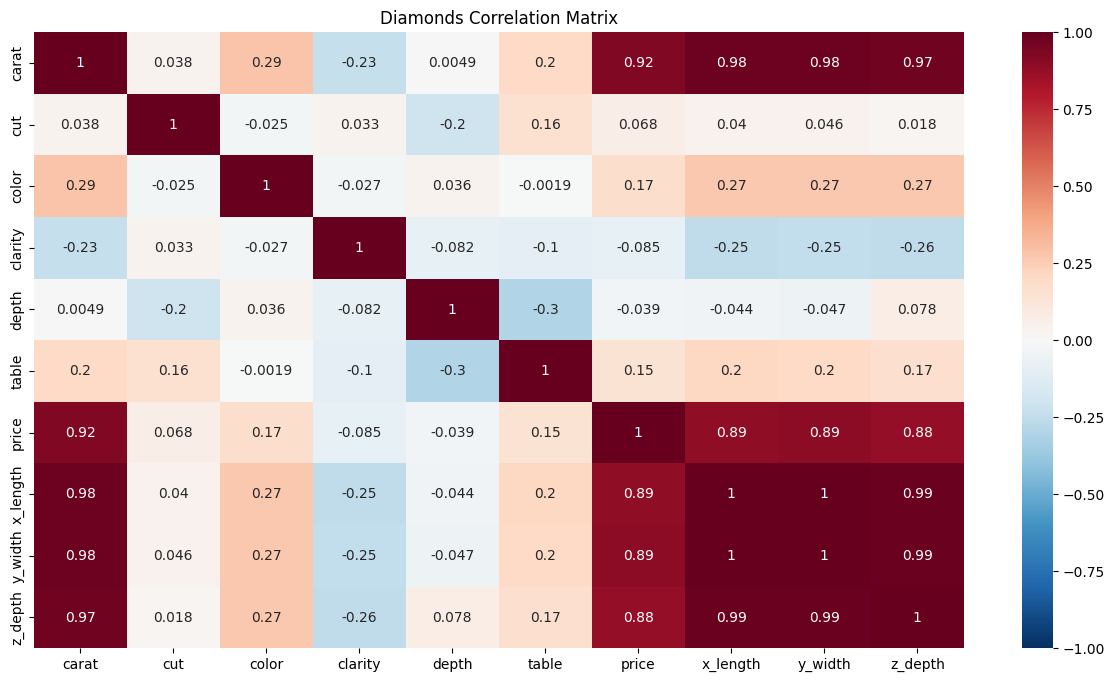

In [28]:
df_corr = df.copy()

corr = df_corr.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Diamonds Correlation Matrix')
plt.show()

__________________________________________________
                MISSING VALUES DATASET
__________________________________________________


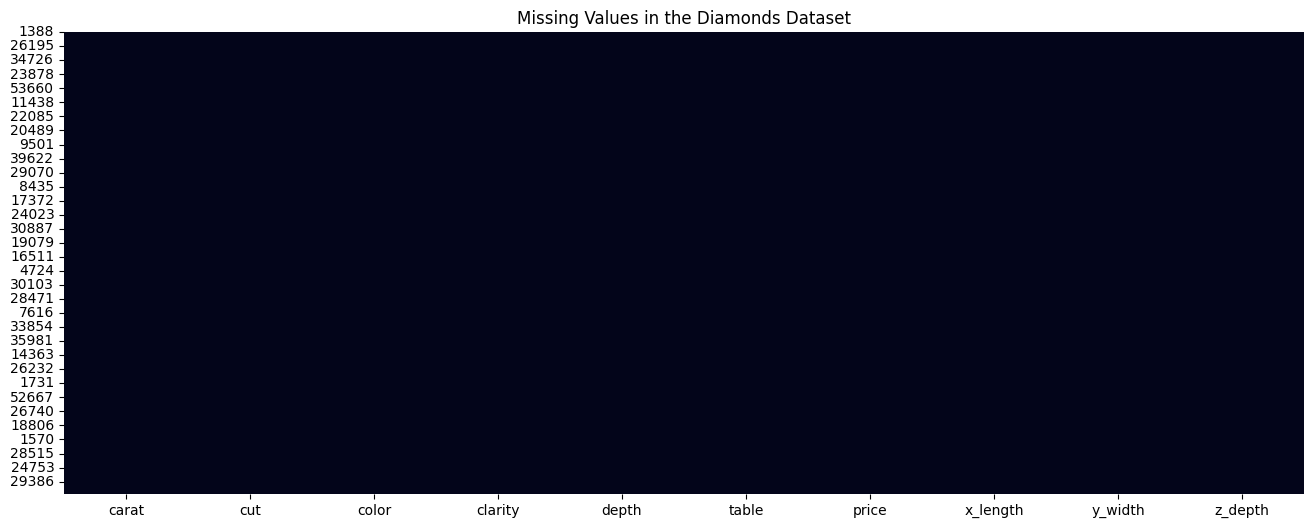

In [31]:
heading('Missing Values Dataset')

plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values in the Diamonds Dataset')
plt.show()

In [32]:
numerical_columns = df.select_dtypes(
    include=['int64', 'float64']).columns.tolist()

skewness = df[numerical_columns].skew()
skewness_df = pd.DataFrame([skewness], index=['Skewness'])

heading('Skewness of Numerical Columns')
round(skewness_df, 2)

__________________________________________________
                SKEWNESS OF NUMERICAL COLUMNS
__________________________________________________


,carat,cut,color,clarity,depth,table,price,x_length,y_width,z_depth
Skewness,1.16,-0.22,0.2,0.14,0.09,0.71,1.64,0.43,0.42,0.41


In [33]:
def plot_histogram_and_boxplot(df, numerical_columns, cyan_palette=["#00FFFF"]):
    sns.set(style="dark", palette='deep')

    plt.figure(figsize=(15, len(numerical_columns) * 5))

    for i, col in enumerate(numerical_columns):
        ax1 = plt.subplot(len(numerical_columns), 2, i * 2 + 1)
        sns.histplot(df[col], kde=True, color=cyan_palette[0])
        plt.title(f'{col} Histogram')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor("#000133")

        ax2 = plt.subplot(len(numerical_columns), 2, 2 * i + 2)
        sns.boxplot

__________________________________________________
                HISTOGRAM AND BOXPLOT
__________________________________________________


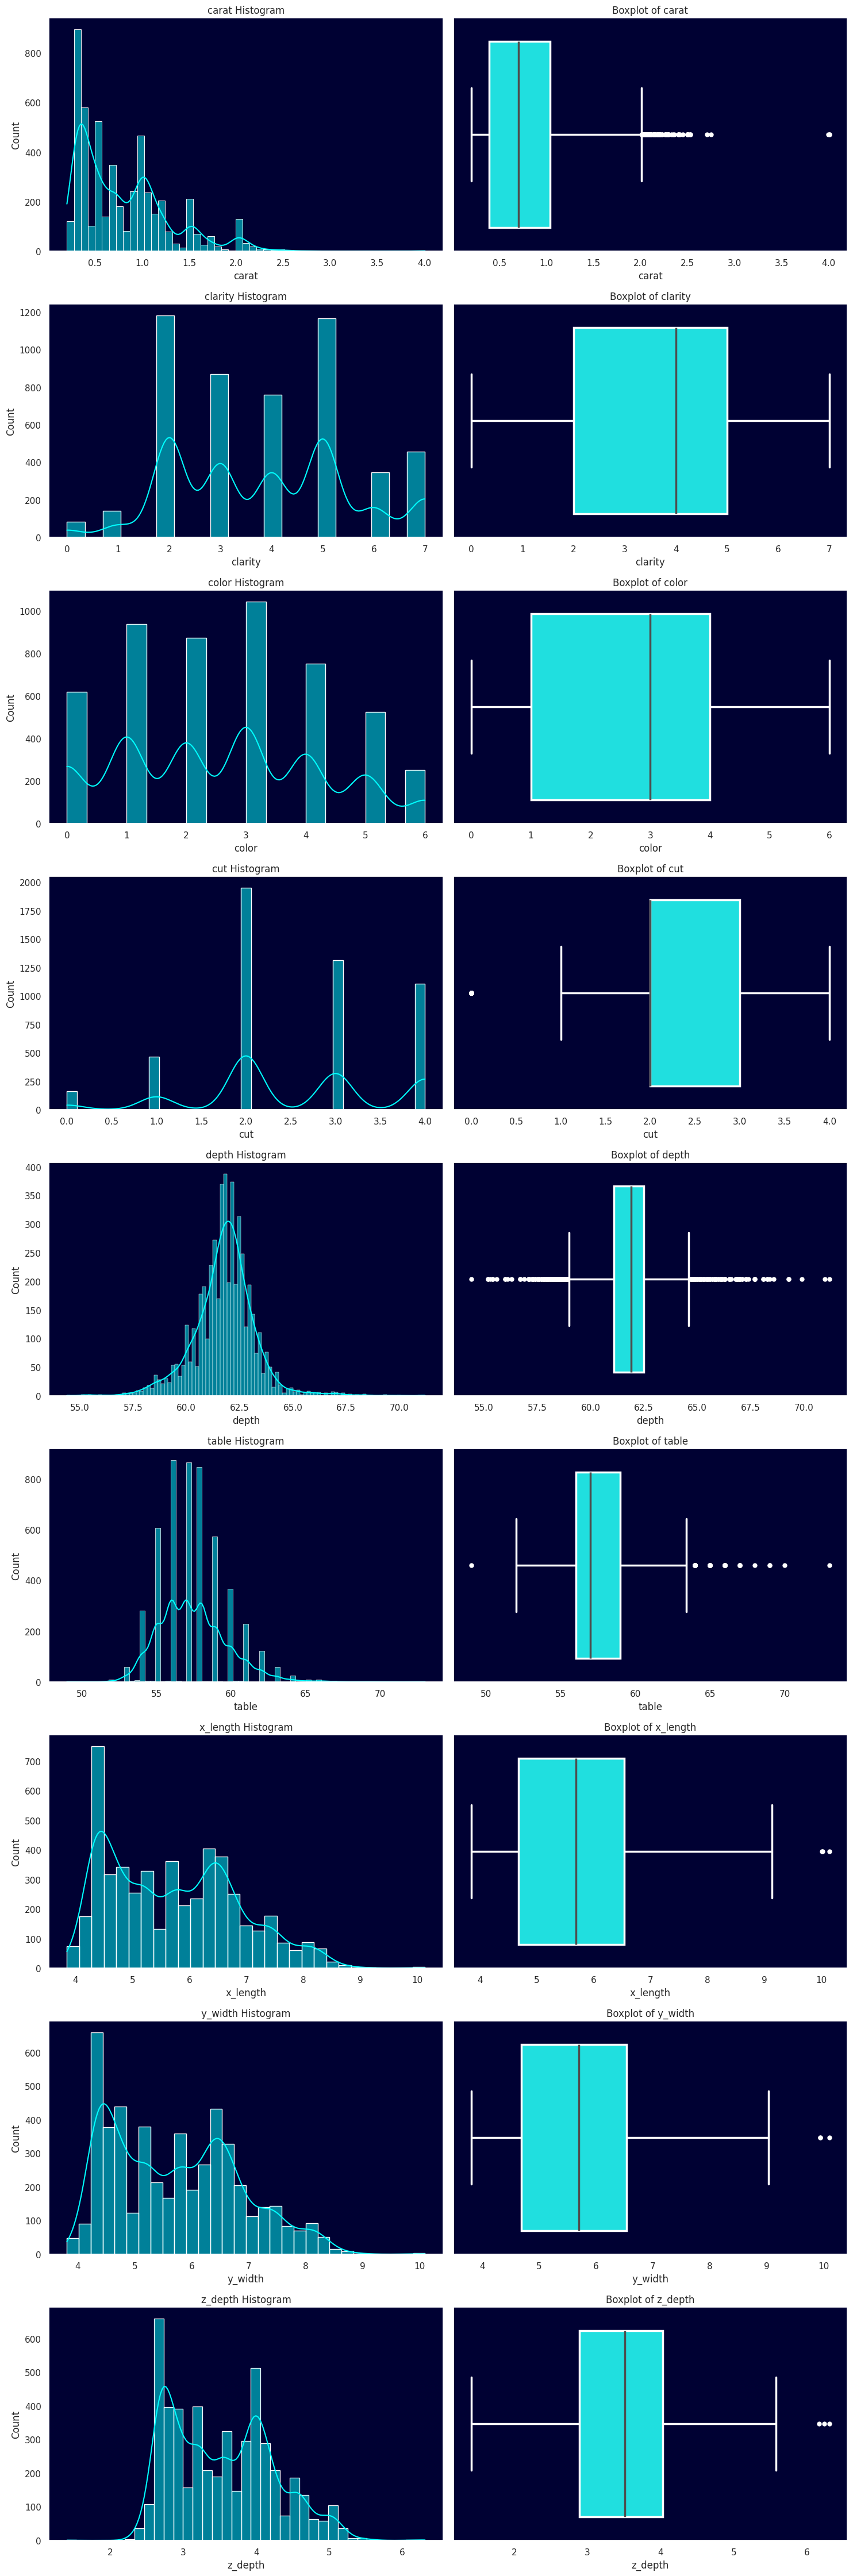

In [36]:
heading("Histogram and Boxplot")
plot_histogram_and_boxplot(df, df[df.columns.difference(['price'])].select_dtypes(include=np.number).columns.tolist())

In [44]:
# Dictionary of regression models with their respective hyperparameters for grid search
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {},
    },
    'Support Vector Regression': {  # Add colon here
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],

        },
    },
    'Decision Tree Regression': {
        'model': DecisionTreeRegressor(),
        'params': {
            'model__splitter': ['best', 'random'],
            'model__max_depth': [None, 1, 2, 3],
        },
    },
    'Random Forest Regression': {
        'model': RandomForestRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
        },
    },
    'Gradient Boosting Regression': {
        'model': GradientBoostingRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
        },
    },
    'AdaBoost Regression': {
        'model': AdaBoostRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
        },
    },
    'KNN Regression': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5],
        },
    },
    'XGBoost Regression': {
        'model': XGBRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
        },
    },
    #'CatBoost Regression': {
    #    'model': CatBoostRegressor(verbose=0),
    #    'params': {
    #        'model__iterations': [10, 100],
    #        'model__depth': [None, 1, 2, 3], 
     #   },
    #},
    'LightGBM Regression': {
        'model': LGBMRegressor(),
        'params': {
            'model__n_estimators': [10],
            'model__max_depth': [None, 1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1],
        },
    },
    'GaussianNB Regression': {
        'model': GaussianNB(),
        'params': {},
    },
    # 'MultinomialNB Regression': {
    #    'model': MultinomialNB(),
    #    'params': {},
    # },
    'BernoulliNB Regression': {
        'model': BernoulliNB(),
        'params': {},
    },
    'ElasitcNet Regression': {
        'model': ElasticNet(),
        'params': {
            'model__alpha': [0.1, 0.2, 0.3],
            'model__l1_ratio': [0.1, 0.2, 0.3],
        },
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {
            'model__alpha': [0.1, 0.2, 0.3],
        },
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {
            'model__alpha': [0.1, 0.2, 0.3],
        },
    },

}

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1388 to 7126
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     5000 non-null   float64
 1   cut       5000 non-null   int64  
 2   color     5000 non-null   int64  
 3   clarity   5000 non-null   int64  
 4   depth     5000 non-null   float64
 5   table     5000 non-null   float64
 6   price     5000 non-null   int64  
 7   x_length  5000 non-null   float64
 8   y_width   5000 non-null   float64
 9   z_depth   5000 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 429.7 KB


In [46]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [47]:
%%time
model_scores = []
best_r2_score = -float('inf')
best_regressor = None

all_models = []
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', QuantileTransformer(random_state=42, output_distribution='normal')),
        ('model', model['model'])
    ])

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model['params'],
        cv=5,
        scoring='neg_mean_absolute_error',
        verbose=0,
        n_jobs=-1,
        error_score='raise'
    )

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    model_scores.append({
        'Model': name,        
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2,
    })
    all_models.append(grid_search)
    if r2 > best_r2_score:
        best_r2_score = r2
        best_regressor = grid_search.best_estimator_

sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=False)
metrics = pd.DataFrame(sorted_models)
best_reg_model = max(sorted_models, key=lambda x: x['R2'])


best_model = best_reg_model['Model']
print(f'Best performing model: {best_model}')
heading("Regression Models Performance")
metrics.round(2)

Best performing model: XGBoost Regression
__________________________________________________
                REGRESSION MODELS PERFORMANCE
__________________________________________________
CPU times: user 7.17 s, sys: 627 ms, total: 7.8 s
Wall time: 1min 28s


,Model,MAPE,MAE,R2
0,AdaBoost Regression,0.29,829.64,0.90
1,BernoulliNB Regression,0.39,1964.46,0.24
2,Decision Tree Regression,0.12,521.45,0.94
3,ElasitcNet Regression,0.82,1508.84,0.75
4,GaussianNB Regression,0.25,1062.76,0.76
5,Gradient Boosting Regression,0.12,432.35,0.96
6,KNN Regression,0.18,687.89,0.91
7,Lasso Regression,0.89,1516.62,0.76
8,LightGBM Regression,0.15,438.69,0.96
9,Linear Regression,0.89,1516.54,0.76


In [48]:
heading("BEST REGRESSION MODEL PERFORMANCE")

print(f"Model: {best_reg_model['Model']}")
print(f"MAPE: {best_reg_model['MAPE']:.2f}")
print(f"MAE: {best_reg_model['MAE']:.2f}")
print(f"R2 Score: {best_reg_model['R2']:.2f}")

__________________________________________________
                BEST REGRESSION MODEL PERFORMANCE
__________________________________________________
Model: XGBoost Regression
MAPE: 0.09
MAE: 374.86
R2 Score: 0.96


In [49]:
for model in all_models:
    model.predict(X_test)

best_model = best_regressor
best_model.predict(X_test)

best_model

Pipeline(steps=[('scaler',
                 QuantileTransformer(output_distribution='normal',
                                     random_state=42)),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

/home/huppdev28/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.984e+08, tolerance: 5.061e+06
  model = cd_fast.enet_coordinate_descent(
/home/huppdev28/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.356e+07, tolerance: 5.061e+06
  model = cd_fast.enet_coordinate_descent(
/home/huppdev28/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

In [51]:
input_data = {
    'carat': 0.3,
    'cut': 'Ideal',
    'color': 'E',
    'clarity': 'VVS1',
    'depth': 61.9,
    'table': 55,
    'x_length': 4.3,
    'y_width': 4.35,
    'z_depth': 2.65
    
}

input_df = pd.DataFrame([input_data])

input_df['cut'] = le_cut.transform(input_df['cut'])
input_df['color'] = le_color.transform(input_df['color'])
input_df['clarity'] = le_clarity.transform(input_df['clarity'])

prediction=[]

for model in all_models:
    # Make predictions on the dummy data
    model_predictions = model.predict(input_df)
    prediction.append(model_predictions)
    

predictions_df = pd.DataFrame(prediction, index=models.keys(), columns=['Predicted Price'])
predictions_df

,Predicted Price
Linear Regression,-1272.006578
Support Vector Regression,-569.054005
Decision Tree Regression,789.000000
Random Forest Regression,821.400000
Gradient Boosting Regression,924.302290
AdaBoost Regression,984.268796
KNN Regression,826.800000
XGBoost Regression,887.203064
LightGBM Regression,865.234681
GaussianNB Regression,640.000000


In [52]:
filename = 'diamond_price_prediction_model.dot'
pickle.dump(best_model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print(result)

[ 2704.3845   4518.736     800.5922   4568.5146   1561.3457    643.4196
  2533.7004   4291.5063   5286.4663   3251.8271  15810.673    4122.701
   778.9265   6272.322   14360.608   10923.364    3187.843    1296.0621
  1088.6395   3134.8828  14768.836     602.3823    866.9893    742.27637
  7696.2256   3806.6301   3089.5916  16496.857    8199.655    4446.1235
 14245.255    7664.077    1017.82983  1725.3475    756.77423   531.65173
 16393.2      7883.32      908.90857 16520.432     654.8355  11086.284
   444.4175    605.61945  1363.0612    523.3898    519.9474  10003.428
   976.01416  2665.7295   1666.2871   3275.4785   2039.7858  10071.494
   788.61273   882.3928    780.4021   4289.408    4842.905    4780.4277
 12901.48     1648.4323   7307.7676   4102.2974    652.02936  1524.9183
  2912.5227  10554.088   12397.633     808.146    5729.4463   3520.6172
  2735.867     648.9786    745.3126    788.07367   913.6792    692.80304
  1531.8634   6647.772    9388.965    4552.5327   6976.4365   142

In [ ]:
classification_models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'model__C': [0.1],
            'model__max_iter': [1000]
        }
    },
    'Support Vector Classifier': {
        'model': SVC(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'model__C': [0.1, 1, 10],
           
        }
    },
    
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__splitter': ['best', 'random'],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4],
            'model__max_features': ['auto', 'sqrt', 'log2']
        }
    },
     'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'AdaBoost Classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [10, 100]
        }
    },
    'K-Nearest Neighbors Classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7]
        }
    },
    'XGBoost Classifier': {
        'model': XGBClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3]
        }
    },
    'CatBoost Classifier': {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'model__iterations': [10, 100],
            'model__depth': [1, 2, 3, 4]
        }
    },
    #'LGBM Classifier': {
    #    'model': LGBMClassifier(),
    #    'params': {
    #        'model__n_estimators': [10, 100],
    #        'model__max_depth': [None, 1, 2, 3],
    #        'model__learning_rate': [0.1, 0.2, 0.3],
    #        'model__verbose': [-1]
    #    }
    #},
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    },
    # 'MultinomialNB': {
    #     'model': MultinomialNB(),
    #     'params': {}
    # },
    'BernoulliNB': {
        'model': BernoulliNB(),
        'params': {}
    },
    'LightGBM Classifier': {
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1]
        }
    },
   
}

In [ ]:
X = df.drop('cut', axis=1)
y = df['cut']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

for col in X:
  if X[col].dtype == 'category':
    X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model_scores = []
best_accuracy = 0
best_estimator = None
for name, model in classification_models.items():
    pipeline = Pipeline([
        ('Scaler', QuantileTransformer(output_distribution="normal", n_quantiles=6400, random_state=42)),
        ('model', model['model'])
    ])

    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=model['params'],
        cv=5,
        scoring='accuracy',
        verbose=0,
        n_jobs=-1,
        random_state=42
    )
  
    random_search.fit(X_train, y_train)
    y_pred = random_search.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

    if accuracy > best_accuracy:  
        best_accuracy = accuracy
        best_estimator = random_search.best_estimator_

sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=False)
metrics = pd.DataFrame(sorted_models)

best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])

heading("Classification Models Performance")
metrics.round(2)

In [ ]:
heading("BEST CLASSIFICATION MODEL PERFORMANCE")
print(f"Model: {best_clf_model['Model']}")
print(f"Accuracy: {best_clf_model['Accuracy']:.2f}")
print(f"Precision: {best_clf_model['Precision']:.2f}")
print(f"Recall: {best_clf_model['Recall']:.2f}")
print(f"F1 Score: {best_clf_model['F1 Score']:.2f}")